In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Vanguard S&P 500 ETF(VOO)


In [ ]:
# Load data from yf
def fetch_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data

ticker = 'VOO'
voo_data = fetch_stock_data(ticker, start='2020-03-05', end='2025-03-05')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Preprocess data
def prepare_data(voo_df):
    # Sorting the data by date to ensure proper time sequence
    voo_df = voo_df.sort_index()
    # Cleaning
    voo_df.dropna(inplace=True)
    # Feature Selection
    X = voo_df[['Open', 'High', 'Low', 'Close', 'Volume']]
    y = voo_df['Close'].shift(-1)
    return X, y

X, y = prepare_data(voo_data)

print(X.head())
print(y.head())

X = X[:-1]
y = y[:-1]

# Splitting into train and test sets (timely split)
train_size = int(0.8 * len(X))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

Price             Open        High         Low       Close    Volume
Ticker             VOO         VOO         VOO         VOO       VOO
Date                                                                
2020-03-05  259.349750  262.227317  255.010289  257.082886   6220000
2020-03-06  249.190481  253.946292  246.673778  252.771225   6669100
2020-03-09  234.913712  241.483034  232.378500  233.266754  16425900
2020-03-10  242.142614  245.238174  232.400380  245.238174  10879100
2020-03-11  238.591524  239.576899  230.187918  233.078979  11480100
Ticker             VOO
Date                  
2020-03-05  252.771225
2020-03-06  233.266754
2020-03-09  245.238174
2020-03-10  233.078979
2020-03-11  210.536163


In [ ]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evalute
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 18.0218
R² Score: 0.9825


In [ ]:
# Feature Coefficients
coefficients = pd.DataFrame(model.coef_.reshape(-1, 1), index=X.columns, columns=['Coefficient'])
print(coefficients)


                Coefficient
Price  Ticker              
Open   VOO    -4.307739e-01
High   VOO     3.931346e-01
Low    VOO     5.569798e-01
Close  VOO     4.772943e-01
Volume VOO     7.760607e-08


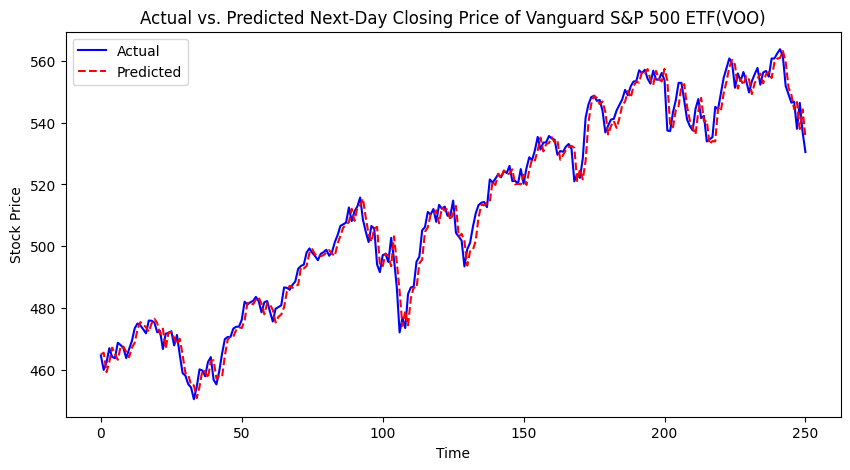

In [ ]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Next-Day Closing Price of Vanguard S&P 500 ETF(VOO)')
plt.show()

In [ ]:
# Convert to 1D arrays
y_test_1d = y_test.values.flatten()
y_pred_1d = y_pred.flatten()

# Plot
plot_df = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})
fig = px.line(plot_df, labels={'index': 'Time', 'value': 'Stock Price'},
              title='Actual vs. Predicted Next-Day Closing Price of Vanguard S&P 500 ETF (VOO)')

fig.show()